# Principal Component Analysis (PCA)

**Overview**
* Unsupervised algorithm
* Primarily dimensionality reduction algorithm
* Other fields of application: tool for visualization, for noise filtering, for feature extraction and engineering
* Rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to learn about the relationship between the x and y values. In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset.
* In order to draw these axes, the "components"-method can be used to define the direction of the vector, and the "explained variance"-method to define the squared-length of the vector.
* These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.
* A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

* PCA's main weakness is that it tends to be highly affected by outliers in the data.
* Scikit-Learn contains a couple interesting variants on PCA. RandomizedPCA uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while SparsePCA introduces a regularization term that serves to enforce sparsity of the components.

### Coding Example 1: Dimensionality Reduction

In [10]:
# Importing the necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

In [12]:
# Creating some random data
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

In [5]:
# n_components defines the number of components to keep
# Here the number is reduced from 2 dimensions to 1 dimension
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


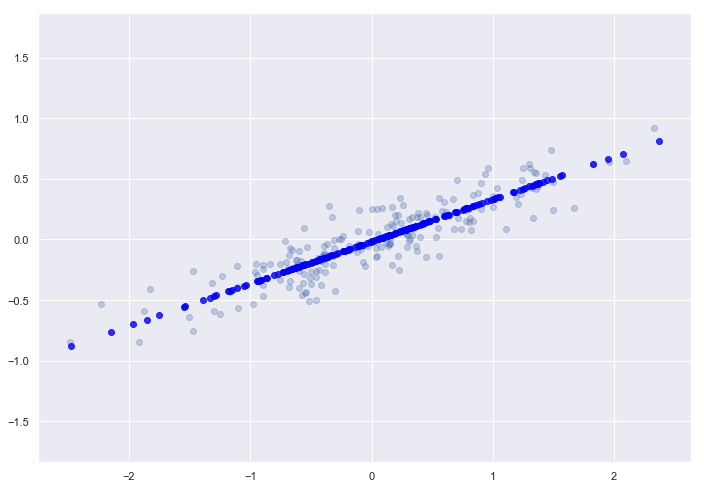

In [15]:
# In order to plot the 1-dimensional data, it has to be transformed into 2 dimensions
# The dark points show the 1-dimensional data that was created by the PCA
# The light points are the original data
X_new = pca.inverse_transform(X_pca)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color="blue")
plt.axis('equal');

### Coding Example 2: Hand-written digits

In [16]:
# Loading the dataset
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [20]:
# Projecting from 64 to 2 dimensions (8x8 Pixels = 64 dimensions)
pca = PCA(2)  
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


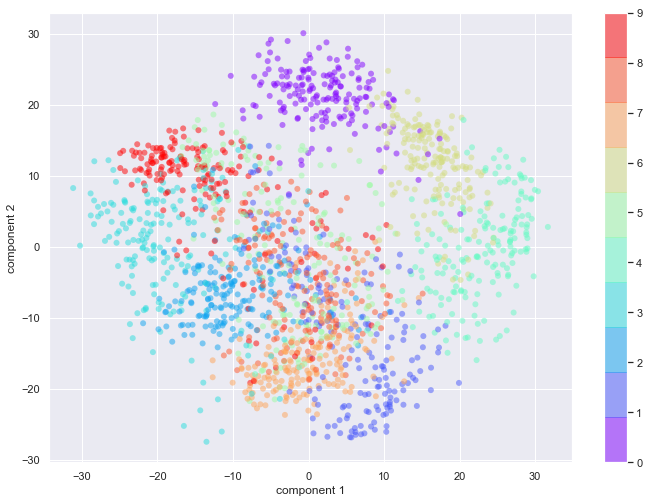

In [19]:
# Plotting the dimensionality-reduced data
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

The graphic shows the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions.

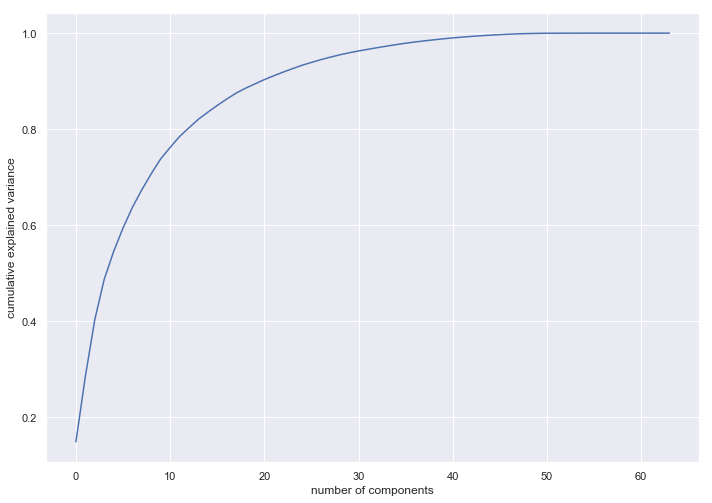

In [21]:
# Estimating the necessary number of components:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. It can be seen that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

We see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. 

### Coding Example 3: PCA as Noise Filtering for hand-written digits

Noise Filtering - The idea: Any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

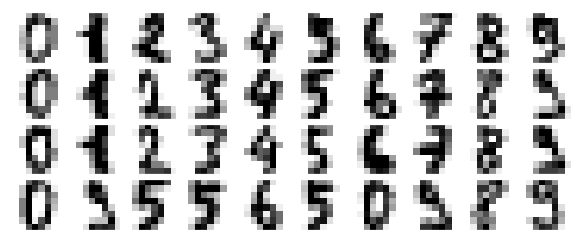

In [23]:
# Plotting the original data: Hand-written digits without noise:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

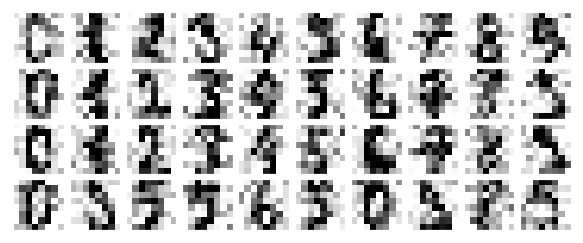

In [24]:
# Adding noise to the data and plotting again:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [25]:
# Training a PCA on the noisy data, requesting that the projection preserves 50% of the variance:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

We can see that 50% of the variance amounts to 12 principal components. 

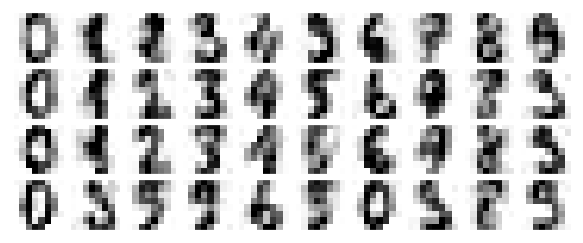

In [26]:
# Computation of these components and then using the inverse of the transform 
# to reconstruct the filtered digits:
components = pca.transform(noisy) 
filtered = pca.inverse_transform(components) # Transforming back to 64 dimensions
plot_digits(filtered)

The example shows that this signal preserving/noise filtering property makes PCA a very useful feature selection routine — for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.